In [152]:
import multiprocessing
import os
import matplotlib.pyplot as plt 
from threading import Thread
import threading 
import math
import numpy
import numpy as np
import time


def task(args):
  print("PID =", os.getpid(), ", args =", args)

  return os.getpid(), args



multiprocessing.cpu_count()



pool = multiprocessing.Pool(processes=4)
start = time.time()
result = pool.map(task, [[1,2,3,4],[5,6],[7],[8]])
end = time.time()
print(end-start)

print(result)


PID = 4177 , args = [1, 2, 3, 4]
PID = 4178 , args = [5, 6]
PID = 4179 , args = [7]
0.039289236068725586
[(4177, [1, 2, 3, 4]), (4178, [5, 6]), (4179, [7]), (4180, [8])]
PID = 4180 , args = [8]


# Q1 Prime in a Power Set:

In [203]:
arr = [x for x in range(1,5)]
print(arr)

[1, 2, 3, 4]


In [204]:
def prime(num):
  flag = True
  if(num>1):
    
    # check for factors
    for i in range(2,num):
        if (num % i) == 0:
          flag = False
          break
    else:
        flag = True

  else:
    flag = False
  return flag

In [205]:
tim = []
def printPowerSet(set,set_size): 
      
    pow_set_size = (int) (math.pow(2, set_size)); 
    counter = 0; 
    j = 0; 
    powerset = []
    for counter in range(0, pow_set_size):
      ls = [] 
      for j in range(0, set_size):   
        if((counter & (1 << j)) > 0): 
          ls.append(set[j]) 
      if(prime(sum(ls))==True):
        powerset.append(ls) 
    return powerset
start = time.time()  
x = printPowerSet(arr, len(arr)); 
print(x)
end = time.time()
tim.append(end-start)

[[2], [1, 2], [3], [2, 3], [1, 4], [1, 2, 4], [3, 4]]


## Using Multithreading

In [206]:
def prime_thread(arr):
  fin_arr = []
  for j in arr:
    num = sum(j)
    flag = True
    if(num>1):
      
      # check for factors
      for i in range(2,num):
          if (num % i) == 0:
            flag = False
            break
      else:
          flag = True

    else:
      flag = False
    if flag==True:
      fin_arr.append(j)
  return fin_arr

In [207]:
def printPowerSet(set,set_size):     
    pow_set_size = (int) (math.pow(2, set_size)); 
    counter = 0; 
    j = 0; 
    powerset = []
    for counter in range(0, pow_set_size):
      ls = [] 
      for j in range(0, set_size):   
        if((counter & (1 << j)) > 0): 
          ls.append(set[j]) 
      
      powerset.append(ls) 
    return powerset

In [208]:
def thread_prime(arr):
    processes = 2
    size=(int)(len(arr)/processes)
    pass_arr=[]
    begin=0
    for i in range(0,processes):
      if(i==processes-1):
        pass_arr.append(arr[begin:])
      else:
        pass_arr.append(arr[begin:begin+size])
        begin=begin+size

    pool = multiprocessing.Pool(processes=processes)
    result = pool.map(prime_thread, pass_arr)
    r=[]
    for i in result:
      r.extend(i)
    return r

In [209]:
start = time.time()
power_arr = printPowerSet(arr,len(arr))
x=thread_prime(power_arr)
end = time.time()
tim.append(end-start)

In [210]:
print(x)

[[2], [1, 2], [3], [2, 3], [1, 4], [1, 2, 4], [3, 4]]


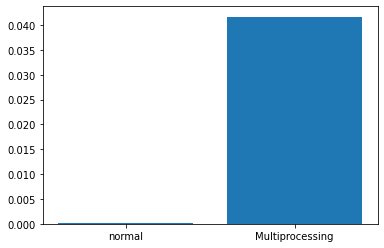

In [212]:
pro = ["normal",'Multiprocessing']
# creating the bar plot 
plt.bar(pro, tim) 
plt.show() 

# Q2. Word Search in English Dictionary: 

### For Loop

In [163]:
!wget https://raw.githubusercontent.com/dwyl/english-words/master/words.txt

--2021-01-25 19:23:59--  https://raw.githubusercontent.com/dwyl/english-words/master/words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4862992 (4.6M) [text/plain]
Saving to: ‘words.txt’

words.txt           100%[===================>]   4.64M  23.5MB/s    in 0.2s    

2021-01-25 19:23:59 (23.5 MB/s) - ‘words.txt’ saved [4862992/4862992]



In [164]:
fp = open('words.txt','r')
def pali(word):
  flag=0
  if(word==word[::-1]):
    flag=1
  else:
    flag=0
  return flag

arr = []
for i in fp:
  arr.append(i.strip('\n'))

In [165]:
start = time.time()
tim = []
ret = []
for i in arr:
  if (pali(i)==1):
    ret.append(i)
  else:
    continue
end = time.time()
tim.append(end-start)  

With Multiprocessing


In [166]:
import multiprocessing
import os
import time
import numpy


In [167]:
fp = open('words.txt','r')
def pali_th(word):
  ret = []
  for i in word:
    if(pali(i)==1):
      ret.append(i)
  return ret

arr = []
for i in fp:
  arr.append(i.strip('\n'))

In [168]:
def palindrome_parallel(arr):
    processes = 10
    size=(int)(len(arr)/processes)
    pass_arr=[]
    begin=0
    for i in range(0,processes):
      if(i==processes-1):
        pass_arr.append(arr[begin:])
      else:
        pass_arr.append(arr[begin:begin+size])
        begin=begin+size

    pool = multiprocessing.Pool(processes=processes)
    result = pool.map(pali_th, pass_arr)
    r=[]
    for i in result:
      r.extend(i)
    return r

In [169]:
start = time.time()
lis = palindrome_parallel(arr)
end = time.time()
len(lis)

319

In [170]:
tim.append(end-start)

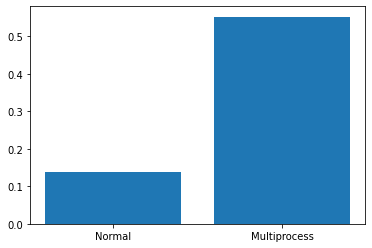

In [171]:
import matplotlib.pyplot as plt
pro = ['Normal', 'Multiprocess']
plt.bar(pro,tim)
plt.show()

# Question 3

In [172]:
!wget https://ocdn.eu/images/pulscms/NGY7MDA_/f8d05506e9250de59fa645f0fb7020e4.jpg

--2021-01-25 19:24:00--  https://ocdn.eu/images/pulscms/NGY7MDA_/f8d05506e9250de59fa645f0fb7020e4.jpg
Resolving ocdn.eu (ocdn.eu)... 213.180.141.132, 213.180.141.128
Connecting to ocdn.eu (ocdn.eu)|213.180.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2271166 (2.2M) [image/jpeg]
Saving to: ‘f8d05506e9250de59fa645f0fb7020e4.jpg.1’

f8d05506e9250de59fa 100%[===================>]   2.17M   902KB/s    in 2.5s    

2021-01-25 19:24:04 (902 KB/s) - ‘f8d05506e9250de59fa645f0fb7020e4.jpg.1’ saved [2271166/2271166]



In [173]:
import cv2
import numpy as np
import time
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/donald.jpg')
tim= []

In [174]:
kernel = (np.random.randint(-1, 1, (10,10,3)))

In [175]:
import cv2

def convolvee(image):
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]

    pad = 0
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad,
        cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")
    # loop over the input image, "sliding" the kernel across
    # each (x, y)-coordinate from left-to-right and top to
    # bottom
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):

            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]

            k = (roi * kernel).sum()

            output[y - pad, x - pad] = k


    output = (output * 255).astype("uint8")
    # return the output image
    return output

In [176]:
tim = []
start = time.time()
new_img = convolvee(img)
end = time.time()
tim.append(end-start)

In [177]:
tim

[78.60613346099854]

# Multiprocessing

In [178]:
import cv2

from google.colab.patches import cv2_imshow
img = cv2.imread('/content/donald.jpg')

In [179]:
def convolve_parallel(arr):
    processes = 5
    size=(int)(arr.shape[0]/processes)
    pass_arr=[]
    begin=0
    for i in range(0,processes):
      if(i==processes-1):
        pass_arr.append(arr[begin:])
      else:
        pass_arr.append(arr[begin:begin+size])
        begin=begin+size

    pool = multiprocessing.Pool(processes=processes)
    result = pool.map(convolvee, pass_arr)
    for i in range(1,len(result)):
      result[0] = np.concatenate((result[0],result[i]))
    return result[0]

In [180]:
start = time.time()
new_img = convolve_parallel(img)
end = time.time()
tim.append(end-start)

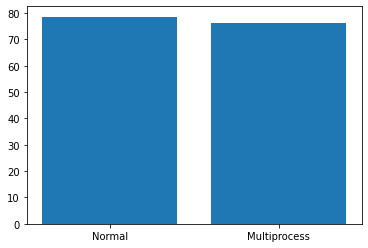

In [182]:
import matplotlib.pyplot as plt
pro = ['Normal', 'Multiprocess']
plt.bar(pro,tim)
plt.show()

In [183]:
tim

[78.60613346099854, 76.10121154785156]